<img src="http://www.rocketsoftware.com/sites/all/themes/rocketon/logo.png" align='top' height=200 width=400>

<br>

<span style="color:#3357A6; font-family: 'Comic Sans MS';font-size: 14pt">Charles Aydin<br>
Senior Lab Services Engineer in Data Science<br>
caydin@rocketsoftware.com<br>
+1 781 577 4445 </span>

# Iris Dataset Exercise

In [5]:
import pandas as pd
import numpy as np
import scipy as sp

pd.set_option('display.max_rows', 200)

# scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import load_iris function from datasets module
from sklearn.datasets import load_iris

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

In [6]:
iris_df = load_iris()
print(type(iris_df))

<class 'sklearn.datasets.base.Bunch'>


In [7]:
iris_df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
from sklearn.datasets.base import Bunch

In [10]:
# Look into the features 
print (iris_df.feature_names)
print (iris_df.data[0:3, :])
print(type(iris_df.data))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
<class 'numpy.ndarray'>


In [11]:
# Look into the labels
print (iris_df.target_names)
print (iris_df.target[:3])
print(type(iris_df.target))

['setosa' 'versicolor' 'virginica']
[0 0 0]
<class 'numpy.ndarray'>


In [12]:
# store feature matrix in X and label vector in y
X = iris_df.data
y = iris_df.target
# print and check shapes of X and y
print("shape of X: ", X.shape, "& shape of y: ", y.shape)

shape of X:  (150, 4) & shape of y:  (150,)


In [4]:
df = pd.DataFrame(X)
df.columns = iris_df['feature_names']
df['target'] = iris_df['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Training a machine learning model with scikit-learn

#### K-nearest neighbors (KNN) classification
This method searches for the K observations in the training data that are “nearest” to the measurements of the new observation. Then it uses the most popular response value from the K nearest neighbors as the predicted response value for the new observation. Following steps:

- Provide a value of K
- “Instantiate” (make an instance of) the “estimator” (scikit-learn’s term for model)
- Train the model with data (Model learns the relationship between X and y, Occurs in-place)
- Predict the response for a new observation

In [13]:
# KNN classification 
# Instantiate the estimator 
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)

# Train the model
# output displays the default values
knn1.fit(X, y)
knn5.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
# Predict the response
X_new = [[3, 4, 5, 2], [5, 2, 3, 2]]
print("n_neighbors=1 predicts: ", knn1.predict(X_new))
print("n_neighbors=5 predicts: ", knn5.predict(X_new))

n_neighbors=1 predicts:  [2 1]
n_neighbors=5 predicts:  [1 1]


## Logistic Regression Classification

Logistic regression is another very common way of classification. Logistic regression was developed by statistician David Cox in 1958. The binary logistic model is used to estimate the probability of a binary response based on one or more features. And for classifying more than two labels, it uses “one versus the rest” technique. In scikit-learn the implementation for all models are very similar, making it very easy for begineers.



In [16]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
# output displays the default values
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# predict the response for new observations
logreg.predict(X_new)

array([2, 2])

## Evaluating the models

One Common evaluation metric for classification accuracy in classification problems is proportion of correct predictions, accuracy_score, on a given set. We can get accuracy_score for the training data or a new set of observations.

### 1. Train and test on the entire dataset
Training and testing on the same data is not recommended as our goal is to estimate likely performance of a model on out-of-sample data. But, maximizing training accuracy rewards overly complex models that won’t necessarily generalize and result in overfitting the training data.

In [18]:
# store the predicted response values
y_pred_knn1 = knn1.predict(X)
y_pred_knn5 = knn5.predict(X)
y_pred_logreg = logreg.predict(X)

# compute classification accuracy for the logistic regression model
print("Accuracy of KNN with n_neighbors=1: ", metrics.accuracy_score(y, y_pred_knn1))
print("Accuracy of KNN with n_neighbors=5: ", metrics.accuracy_score(y, y_pred_knn5))
print("Accuracy of logistic regression: ", metrics.accuracy_score(y, y_pred_logreg))

Accuracy of KNN with n_neighbors=1:  1.0
Accuracy of KNN with n_neighbors=5:  0.966666666667
Accuracy of logistic regression:  0.96


### 3. Train / test Split Method
It is one of the most common way to test the accuracy of a model. Its fairly intuitive to understand, split the dataset into a training set and a testing set in any proportion. Train the model on the training set. Test the model on the testing set.

Note tha I use random_state=some_number, to guarantee that my split is always identica;s. This is useful to get reproducible results, and compare across models.

In [19]:
# Splitting the data in 75% training data and 25% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print("shape of X_train: ", X_train.shape, "& shape of y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape, "& shape of y_test: ", y_test.shape)

shape of X_train:  (90, 4) & shape of y_train:  (90,)
shape of X_test:  (60, 4) & shape of y_test:  (60,)


In [20]:
# Instantiate the estimators 
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()

# Train the models
# output displays the default values
logreg.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn5.fit(X_test, y_test)
print('\n')

# Predictions
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn5 = knn5.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

# compute classification accuracy for the logistic regression model
print("Accuracy of KNN with n_neighbors=1: ", metrics.accuracy_score(y_test, y_pred_knn1))
print("Accuracy of KNN with n_neighbors=5: ", metrics.accuracy_score(y_test, y_pred_knn5))
print("Accuracy of logistic regression: ", metrics.accuracy_score(y_test, y_pred_logreg))



Accuracy of KNN with n_neighbors=1:  0.95
Accuracy of KNN with n_neighbors=5:  0.983333333333
Accuracy of logistic regression:  0.95


### 3. Best estimate of K for KNN-classification
Instead of guessing what K value to use for our KNN-classification, we can find the optimum value by testing our data for a range of k-values. We can then plot accuracy on test-data as a function of k to pick the one that gives highest accuracy.

In [21]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26, 2))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

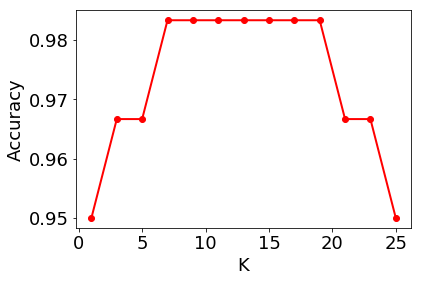

In [22]:
# plot the relationship between K and testing accuracy
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, scores, 'ro', linewidth=2.0, linestyle="-")
plt.xlabel('K')
plt.ylabel('Accuracy')